# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/Part01/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

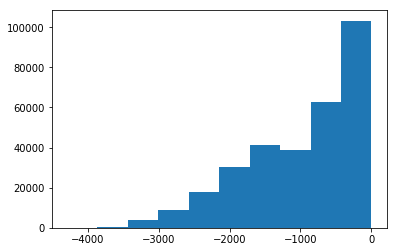

,DAYS_LAST_PHONE_CHANGE
-3607.0,1
-3900.0,1
-4016.0,1
-3899.0,1
-4018.0,1
-4021.0,1
-3397.0,1
-4292.0,1
-4185.0,1
-3905.0,1


In [5]:
plt.hist(app_train['DAYS_LAST_PHONE_CHANGE'].dropna())
plt.show()
pd.DataFrame(app_train['DAYS_LAST_PHONE_CHANGE'].value_counts()).sort_values(by='DAYS_LAST_PHONE_CHANGE')

In [6]:
app_train["DAYS_LAST_PHONE_CHANGE"]=abs(app_train["DAYS_LAST_PHONE_CHANGE"])
(app_train['DAYS_LAST_PHONE_CHANGE']).describe()

C:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    307510.000000
mean        962.858788
std         826.808487
min           0.000000
25%                NaN
50%                NaN
75%                NaN
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [7]:
cut_rule=np.linspace(0,max(app_train["DAYS_LAST_PHONE_CHANGE"]),11)
app_train["DAYS_LAST_PHONE_CHANGE_GROUP"]=pd.cut(app_train["DAYS_LAST_PHONE_CHANGE"],cut_rule)
app_train["DAYS_LAST_PHONE_CHANGE_GROUP"].value_counts()
phone_groups=app_train.groupby('DAYS_LAST_PHONE_CHANGE_GROUP').mean()
phone_groups

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM
DAYS_LAST_PHONE_CHANGE_GROUP,,,,,,,,,,,,,,,,,,,,,
"(0, 429.2]",278434.011253,0.093986,0.138540,0.324668,0.647323,0.406120,165749.885091,567137.674174,25546.664412,510055.742349,...,0.001327,0.001266,0.000610,0.005667,0.008882,0.035056,0.233298,0.291205,1.524558,0.176491
"(429.2, 858.4]",277970.453743,0.091779,0.111952,0.334416,0.725512,0.425939,168898.544955,590782.487474,27354.260423,532544.999231,...,0.000384,0.000304,0.000368,0.006933,0.006266,0.034664,0.232782,0.280988,2.012056,0.157801
"(858.4, 1287.6]",277796.382472,0.077627,0.083784,0.337257,0.721876,0.406969,169843.982334,606720.102007,27423.065420,545585.682242,...,0.000440,0.000362,0.000310,0.005814,0.006466,0.035060,0.270007,0.275227,2.119594,0.180967
"(1287.6, 1716.8]",279294.030611,0.066267,0.074951,0.345890,0.662503,0.411454,170333.186652,624403.888544,27331.951681,562401.541320,...,0.000461,0.000194,0.000097,0.005855,0.006314,0.034077,0.312873,0.266816,2.256860,0.188202
"(1716.8, 2146]",277470.494483,0.060804,0.067188,0.364297,0.665761,0.438198,172302.552192,630026.392947,28073.340766,567268.201564,...,0.000491,0.000295,0.000098,0.006097,0.006025,0.036330,0.312520,0.266112,2.130438,0.171671
"(2146, 2575.2]",278163.246437,0.056793,0.065479,0.366147,0.660746,0.421214,173462.337634,644678.823357,28256.295017,580385.884423,...,0.000390,0.000390,0.000167,0.007268,0.007082,0.034849,0.319667,0.248230,1.953907,0.167038
"(2575.2, 3004.4]",278657.430783,0.053617,0.061706,0.385602,0.672175,0.428703,176435.279293,650281.600358,28897.257310,587806.119061,...,0.000462,0.000578,0.000000,0.007085,0.009532,0.033363,0.334149,0.252737,1.968569,0.164779
"(3004.4, 3433.6]",277236.082898,0.044561,0.054767,0.423948,0.657207,0.409759,195058.699515,718174.186333,31340.175504,648290.190613,...,0.000747,0.000498,0.000000,0.008378,0.008657,0.033510,0.362748,0.259704,2.019827,0.154344
"(3433.6, 3862.8]",277714.879173,0.041335,0.069952,0.459459,0.659777,0.411765,221453.613672,738277.018283,34520.086645,669903.031002,...,0.000000,0.000000,0.000000,0.005435,0.005435,0.038043,0.333333,0.219203,1.625000,0.154213


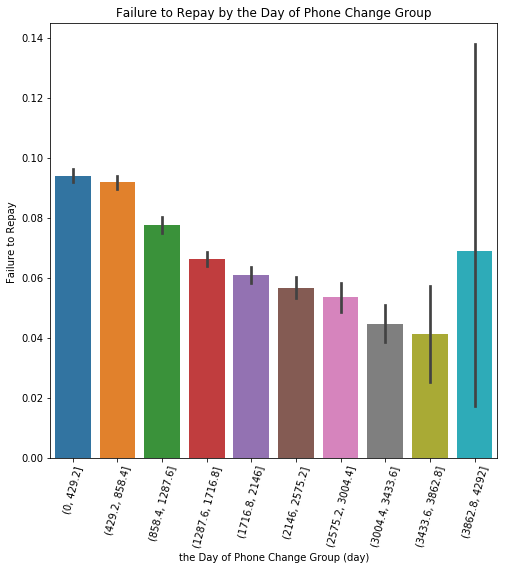

In [8]:
import seaborn as sns
plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot

px = app_train["DAYS_LAST_PHONE_CHANGE_GROUP"] 
py = app_train["TARGET"]
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('the Day of Phone Change Group (day)'); plt.ylabel('Failure to Repay ')
plt.title('Failure to Repay by the Day of Phone Change Group');